In [1]:
import os
import datetime

from google.colab import drive
drive.mount('/content/drive')
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

Mounted at /content/drive


In [2]:
data="/content/drive/MyDrive/P2M/Data/Data.csv"
df = pd.read_csv(data)
df.head()

,Mvt,Temp,Date,Time,TempExt
0,0.0,29.0,2021-08-10,00:00:04,36
1,1.0,30.0,2021-08-10,00:00:08,36
2,0.0,30.0,2021-08-10,00:00:12,36
3,1.0,29.0,2021-08-10,00:00:14,36
4,0.0,29.0,2021-08-10,00:00:21,36


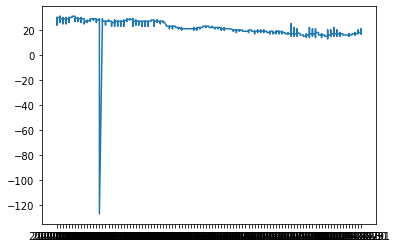

In [3]:
plt.plot(df['Date'],df['Temp'])
plt.show()

In [4]:
df1=df.copy()
df1.head()

,Mvt,Temp,Date,Time,TempExt
0,0.0,29.0,2021-08-10,00:00:04,36
1,1.0,30.0,2021-08-10,00:00:08,36
2,0.0,30.0,2021-08-10,00:00:12,36
3,1.0,29.0,2021-08-10,00:00:14,36
4,0.0,29.0,2021-08-10,00:00:21,36


In [5]:
indexNames = df1[ df1['Temp'] <0 ].index
indexNames

Int64Index([505994], dtype='int64')

In [6]:
df1.drop(indexNames , inplace=True)

In [7]:
df1.describe()

,Mvt,Temp,TempExt
count,3.722749e+06,3.722749e+06,3.722749e+06
mean,6.526392e-01,2.200489e+01,1.932440e+01
std,4.761316e-01,4.323730e+00,7.290517e+00
min,0.000000e+00,1.300000e+01,0.000000e+00
25%,0.000000e+00,1.800000e+01,1.400000e+01
50%,1.000000e+00,2.100000e+01,1.900000e+01
75%,1.000000e+00,2.700000e+01,2.500000e+01
max,1.000000e+00,3.100000e+01,4.800000e+01


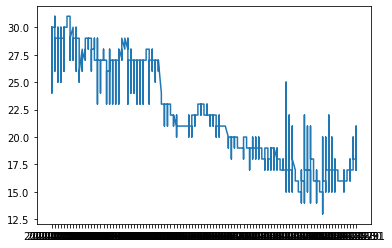

In [8]:
plt.plot(df1['Date'],df1['Temp'])
plt.show()

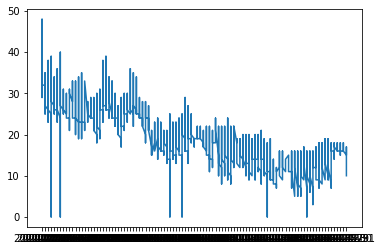

In [9]:
plt.plot(df1['Date'],df1['TempExt'])
plt.show()

# **2.Train Model**

In [10]:
pd.to_datetime(df1['Date'] + ' ' + df1['Time'])

0         2021-08-10 00:00:04
1         2021-08-10 00:00:08
2         2021-08-10 00:00:12
3         2021-08-10 00:00:14
4         2021-08-10 00:00:21
                  ...        
3722745   2021-12-31 23:59:53
3722746   2021-12-31 23:59:54
3722747   2021-12-31 23:59:56
3722748   2021-12-31 23:59:58
3722749   2021-12-31 23:59:59
Length: 3722749, dtype: datetime64[ns]

In [11]:
df1['DateTime']=pd.to_datetime(df1['Date'] + ' ' + df1['Time'])

In [12]:
df1 = df1.drop(columns="Date")
df1 = df1.drop(columns="Time")

In [13]:
df1.head()

,Mvt,Temp,TempExt,DateTime
0,0.0,29.0,36,2021-08-10 00:00:04
1,1.0,30.0,36,2021-08-10 00:00:08
2,0.0,30.0,36,2021-08-10 00:00:12
3,1.0,29.0,36,2021-08-10 00:00:14
4,0.0,29.0,36,2021-08-10 00:00:21


In [14]:
date_time = pd.to_datetime(df1.pop('DateTime'), format='%d.%m.%Y %H:%M:%S')

In [15]:
df1.head()

,Mvt,Temp,TempExt
0,0.0,29.0,36
1,1.0,30.0,36
2,0.0,30.0,36
3,1.0,29.0,36
4,0.0,29.0,36


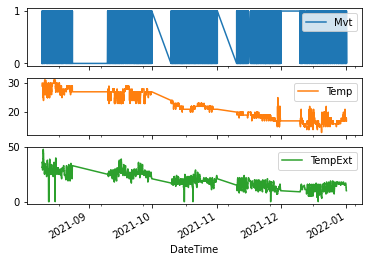

In [16]:
plot_cols = ['Mvt', 'Temp', 'TempExt']
plot_features = df1[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [17]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mvt,3722749.0,0.652639,0.476132,0.0,0.0,1.0,1.0,1.0
Temp,3722749.0,22.004894,4.323730,13.0,18.0,21.0,27.0,31.0
TempExt,3722749.0,19.324402,7.290517,0.0,14.0,19.0,25.0,48.0


In [18]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s

0          1.628554e+09
1          1.628554e+09
2          1.628554e+09
3          1.628554e+09
4          1.628554e+09
               ...     
3722745    1.640995e+09
3722746    1.640995e+09
3722747    1.640995e+09
3722748    1.640995e+09
3722749    1.640995e+09
Name: DateTime, Length: 3722749, dtype: float64

In [19]:
df1.head()

,Mvt,Temp,TempExt
0,0.0,29.0,36
1,1.0,30.0,36
2,0.0,30.0,36
3,1.0,29.0,36
4,0.0,29.0,36


In [20]:
day = 24*60*60
year = (365.2425)*day

df1['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df1['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df1['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df1['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
df1.head()

,Mvt,Temp,TempExt,Day sin,Day cos,Year sin,Year cos
0,0.0,29.0,36,0.000291,1.000000,-0.621850,-0.783136
1,1.0,30.0,36,0.000582,1.000000,-0.621851,-0.783136
2,0.0,30.0,36,0.000873,1.000000,-0.621851,-0.783135
3,1.0,29.0,36,0.001018,0.999999,-0.621851,-0.783135
4,0.0,29.0,36,0.001527,0.999999,-0.621853,-0.783134


Text(0.5, 1.0, 'Time of day signal')

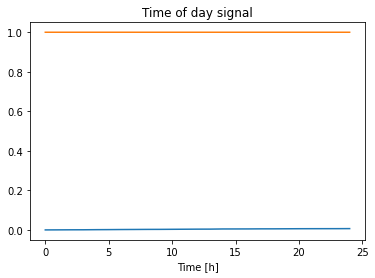

In [21]:
plt.plot(np.array(df1['Day sin'])[:25])
plt.plot(np.array(df1['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

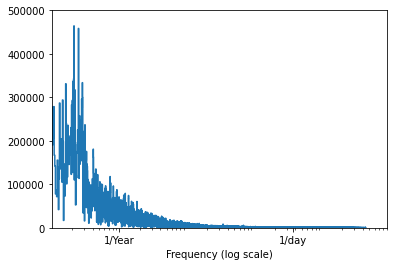

In [22]:
fft = tf.signal.rfft(df['Temp'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['Temp'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 500000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

Split the data
You'll use a (70%, 20%, 10%) split for the training, validation, and test sets. Note the data is not being randomly shuffled before splitting. This is for two reasons:

It ensures that chopping the data into windows of consecutive samples is still possible.
It ensures that the validation/test results are more realistic, being evaluated on the data collected after the model was trained.


In [23]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df1[0:int(n*0.7)]
val_df = df1[int(n*0.7):int(n*0.9)]
test_df = df1[int(n*0.9):]

num_features = df1.shape[1]

Normalize the data


In [24]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

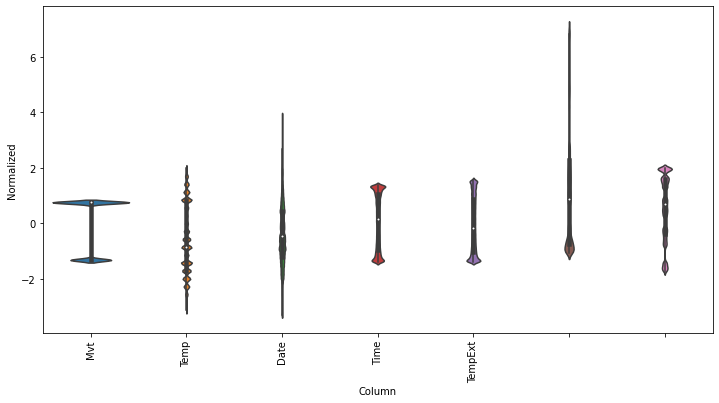

In [25]:
df_std = (df1 - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [26]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [27]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Temp'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Temp']

In [28]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['Temp'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Temp']

In [29]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [30]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 7)
Inputs shape: (3, 6, 7)
Labels shape: (3, 1, 1)


In [31]:
w2.example = example_inputs, example_labels

In [32]:
def plot(self, model=None, plot_col='Temp', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

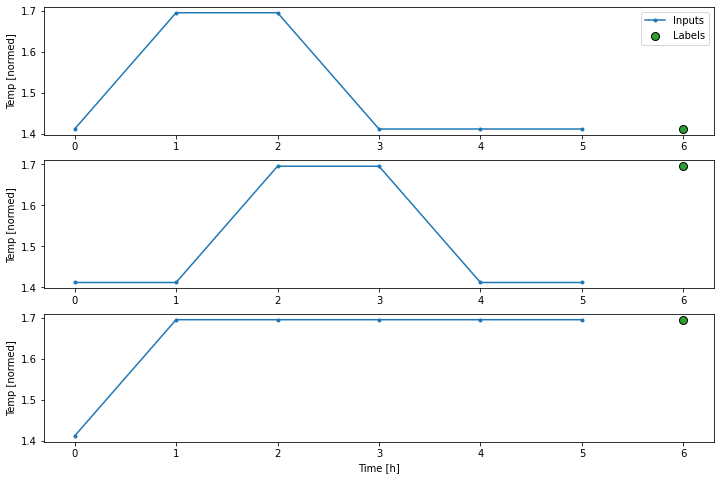

In [33]:
w2.plot()

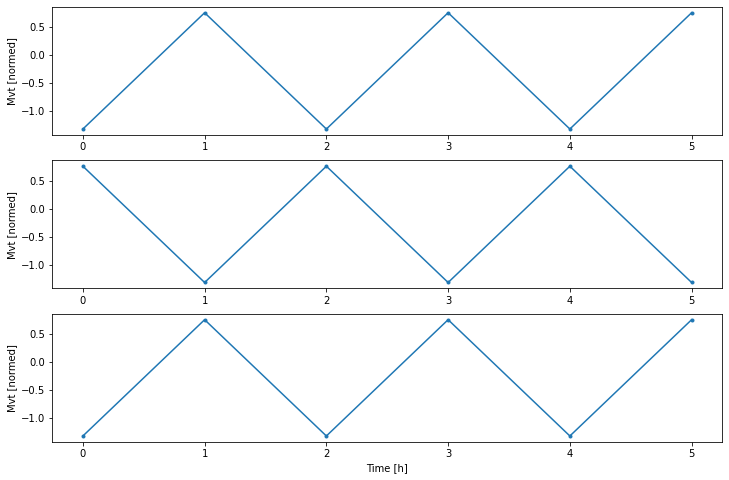

In [34]:
w2.plot(plot_col='Mvt')

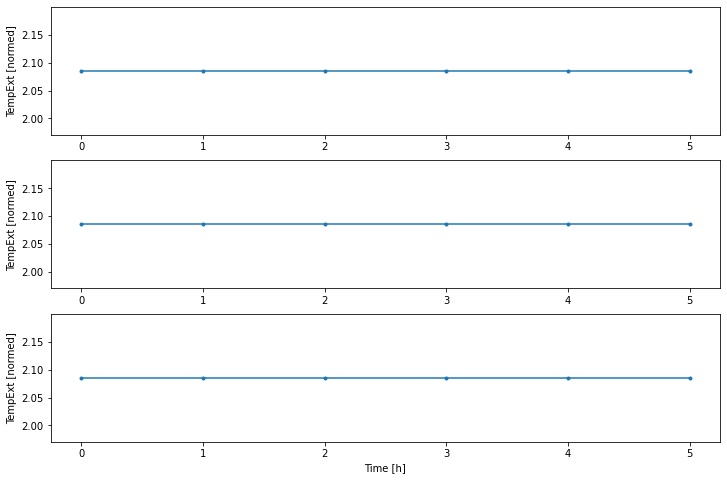

In [35]:
w2.plot(plot_col='TempExt')

In [36]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [37]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [38]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 7), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [39]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 7)
Labels shape (batch, time, features): (32, 1, 1)


In [40]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Temp'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Temp']

In [41]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 7)
Labels shape (batch, time, features): (32, 1, 1)


In [42]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [43]:
baseline = Baseline(label_index=column_indices['Temp'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

23268/23268 [==============================] - 91s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0075


In [44]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['Temp'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Temp']

In [45]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 7)
Output shape: (32, 24, 1)


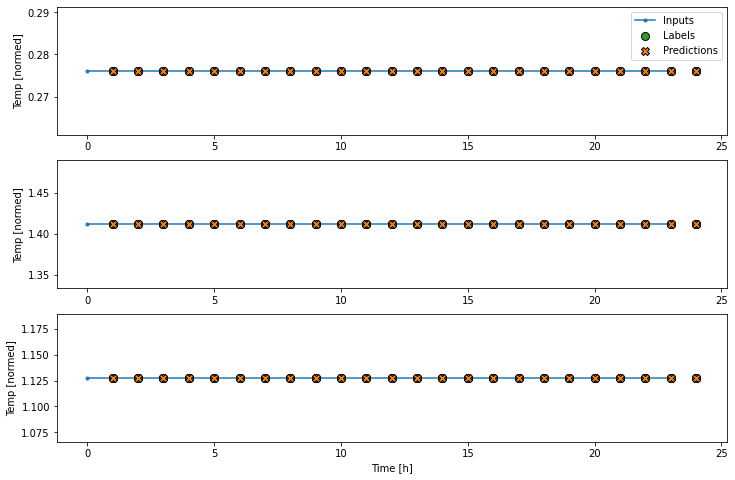

In [46]:
wide_window.plot(baseline)

In [47]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [48]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 7)
Output shape: (32, 1, 1)


In [49]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [50]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
81436/81436 [==============================] - 403s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0174 - val_loss: 0.0021 - val_mean_absolute_error: 0.0110
Epoch 2/20
81436/81436 [==============================] - 419s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0075 - val_loss: 0.0021 - val_mean_absolute_error: 0.0108
Epoch 3/20
81436/81436 [==============================] - 476s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0075 - val_loss: 0.0021 - val_mean_absolute_error: 0.0108
Epoch 4/20
81436/81436 [==============================] - 414s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0075 - val_loss: 0.0021 - val_mean_absolute_error: 0.0110
Epoch 5/20
81436/81436 [==============================] - 417s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0075 - val_loss: 0.0021 - val_mean_absolute_error: 0.0094
Epoch 6/20
81436/81436 [==============================] - 430s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0075 - val_loss: 0.0022 - val_mean_abs

In [51]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 7)
Output shape: (32, 24, 1)


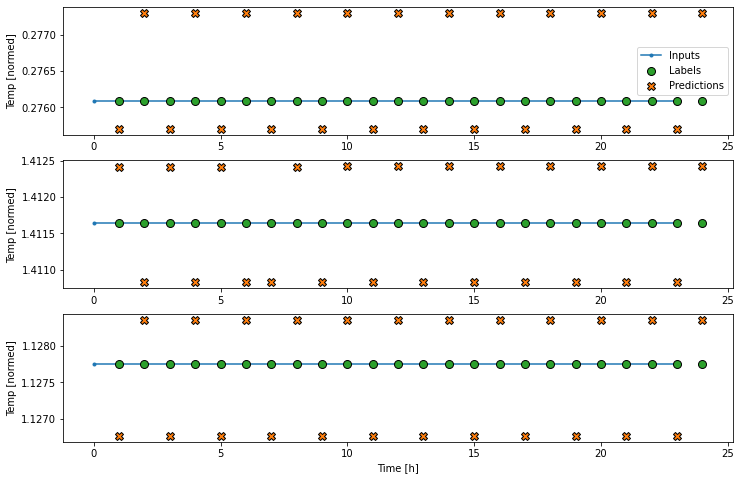

In [52]:
wide_window.plot(linear)

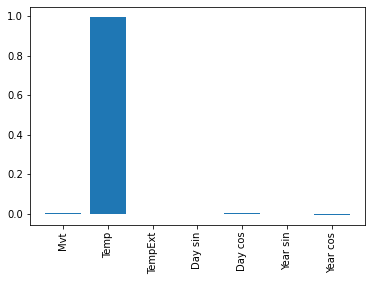

In [53]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [54]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
81436/81436 [==============================] - 455s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0142 - val_loss: 0.0023 - val_mean_absolute_error: 0.0171
Epoch 2/20
81436/81436 [==============================] - 462s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0111 - val_loss: 0.0023 - val_mean_absolute_error: 0.0195
Epoch 3/20
81436/81436 [==============================] - 448s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0105 - val_loss: 0.0023 - val_mean_absolute_error: 0.0188
Epoch 4/20
81436/81436 [==============================] - 447s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0102 - val_loss: 0.0023 - val_mean_absolute_error: 0.0186
Epoch 5/20
81436/81436 [==============================] - 455s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0101 - val_loss: 0.0031 - val_mean_absolute_error: 0.0356
Epoch 6/20
23268/23268 [==============================] - 101s 4ms/step - loss: 0.0035 - mean_absolute_error: 0.0402


In [55]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Temp'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['Temp']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

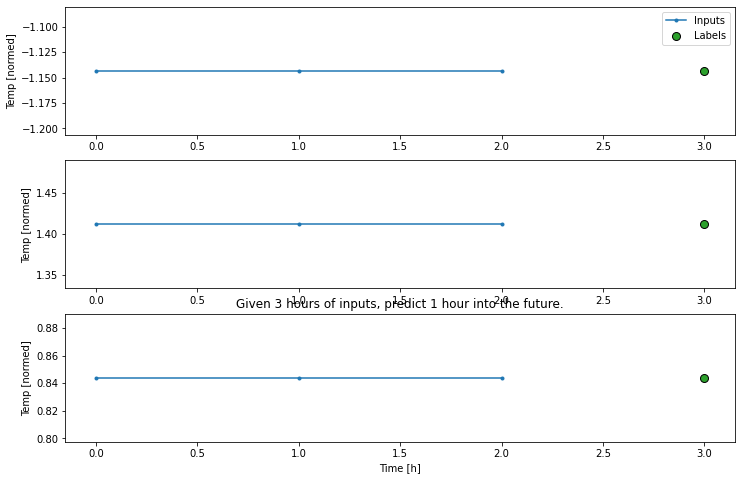

In [56]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [57]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [58]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 7)
Output shape: (32, 1, 1)


In [59]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

23268/23268 [==============================] - 101s 4ms/step - loss: 0.0018 - mean_absolute_error: 0.0149


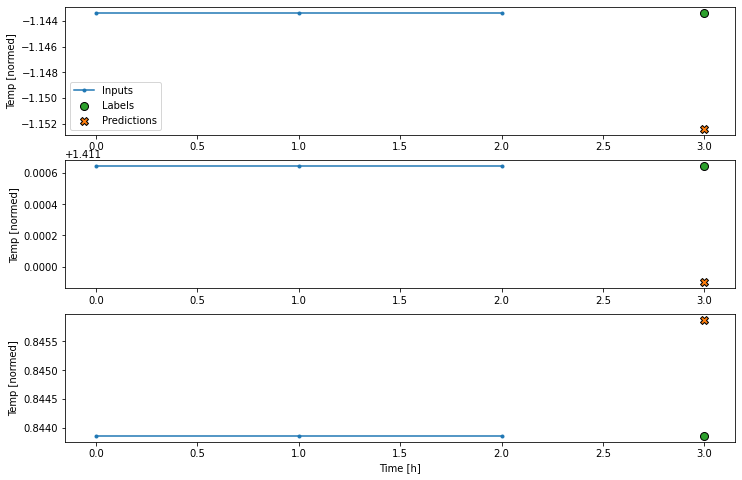

In [60]:
conv_window.plot(multi_step_dense)

In [61]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 7)

ValueError:Exception encountered when calling layer "sequential_2" (type Sequential).

Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 21, but received input with shape (32, 168)

Call arguments received:
  • inputs=tf.Tensor(shape=(32, 24, 7), dtype=float32)
  • training=None
  • mask=None


In [62]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [63]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 7)
Output shape: (32, 1, 1)


In [64]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

23268/23268 [==============================] - 89s 4ms/step - loss: 0.0018 - mean_absolute_error: 0.0171


In [65]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 7)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [66]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Temp'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['Temp']

In [67]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 7)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


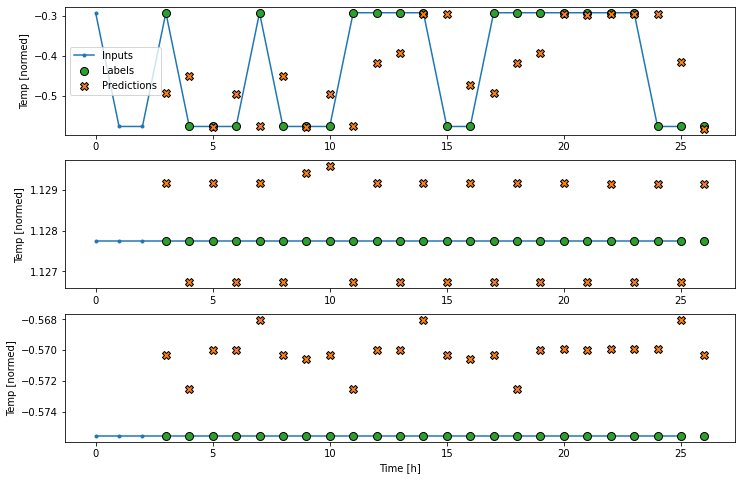

In [68]:
wide_conv_window.plot(conv_model)

In [69]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [70]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 7)
Output shape: (32, 24, 1)


In [71]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

23267/23267 [==============================] - 141s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0420


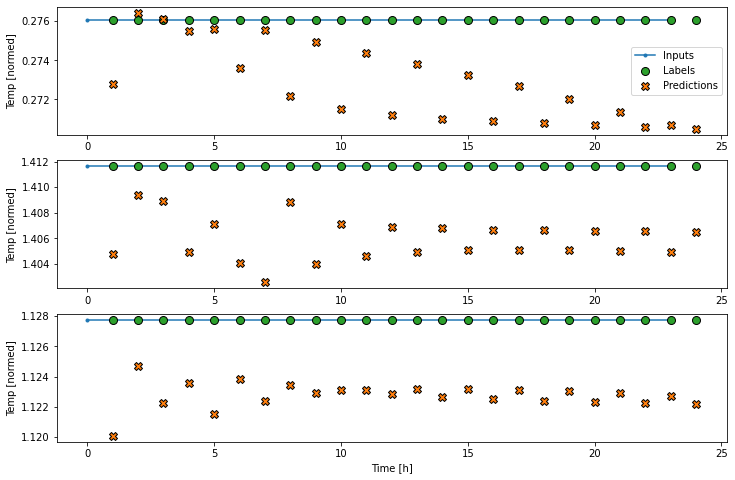

In [72]:
wide_window.plot(lstm_model)

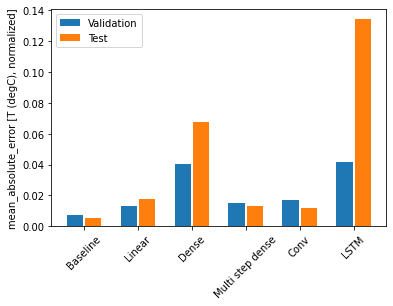

In [73]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Temp, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [74]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0053
Linear      : 0.0180
Dense       : 0.0675
Multi step dense: 0.0130
Conv        : 0.0119
LSTM        : 0.1342
